**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
library("UpSetR")
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



## Prepare

**Set global variable**

In [2]:
vec = c(
    "fcc_astarr_macs_input_overlap",
    "fcc_astarr_macs_input_union"
)
names(vec) = vec

VEC_TXT_FOLDER = vec
for(txt in vec){cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


In [3]:
TXT_FNAME_ANNOT = "region.annotation.fcc_crispri_hcrff.tsv"

**View files**

In [4]:
txt_fdiry = file.path(FD_RES, "region_annotation", "*", "summary")
txt_fname = TXT_FNAME_ANNOT
txt_fglob = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for(txt in vec){cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/region.annotation.fcc_crispri_hcrff.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_union/summary/region.annotation.fcc_crispri_hcrff.tsv 


## Import data

**Read region annotation**

In [5]:
### loop to import data
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry = file.path(FD_RES, "region_annotation", txt_folder, "summary")
    txt_fname = TXT_FNAME_ANNOT
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})
names(lst) = VEC_TXT_FOLDER

### assign and show
lst_dat_region_annot_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 84 11

$fcc_astarr_macs_input_union
[1] 86 11



Chrom,ChromStart,ChromEnd,Region,Annotation_A,Annotation_B,Group,Label,Gene,Region_Annot,Region_Count
chr11,5249957,5250351,chr11:5249957-5250351,fcc_astarr_macs_input_overlap,fcc_crispri_hcrff_casa,CRISPRi-HCRFF,CRISPRi-HCRFF:HBG1,HBG1,chr11:5249847-5250847,1
chr11,5249957,5250351,chr11:5249957-5250351,fcc_astarr_macs_input_overlap,fcc_crispri_hcrff_casa,CRISPRi-HCRFF,CRISPRi-HCRFF:HBG2,HBG2,chr11:5249847-5250847,1
chr11,5254200,5254444,chr11:5254200-5254444,fcc_astarr_macs_input_overlap,fcc_crispri_hcrff_casa,CRISPRi-HCRFF,CRISPRi-HCRFF:HBG1,HBG1,chr11:5253647-5254647,1


**Read region**

In [6]:
### set file directory
txt_fdiry = file.path(FD_RES, "region", "fcc_crispri_hcrff", "summary")
txt_fname = "K562.hg38.CRISPRi_HCRFF.CASA.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

### read table
dat = read_tsv(txt_fpath, show_col_types = FALSE)

### assign and show
dat_region_original = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 113  10


Chrom,ChromStart,ChromEnd,Name,Score,Strand,Gene_Symbol,Gene_Ensembl,Group,Label
chr11,5248847,5249047,chr11:5248847-5249047,1.0686240,.,HBG1,ENST00000330597.5,CRISPRi-HCRFF,CRISPRi-HCRFF:HBG1
chr11,5248847,5249047,chr11:5248847-5249047,0.9357701,.,HBG2,ENST00000336906.6,CRISPRi-HCRFF,CRISPRi-HCRFF:HBG2
chr11,5249847,5250847,chr11:5249847-5250847,1.8908899,.,HBG1,ENST00000330597.5,CRISPRi-HCRFF,CRISPRi-HCRFF:HBG1


## Explore: Count table

**Total peaks**

In [7]:
dat = dat_region_original
dat = dat %>% 
    dplyr::mutate(Region = fun_gen_region(Chrom, ChromStart, ChromEnd)) %>%
    dplyr::select(Region, Group) %>%
    dplyr::distinct()

res = table(dat$Group, dnn = "Group")
dat = as.data.frame(res)

### assign and show
dat_region_peak_count = dat
fun_display_table(dat)

Group,Freq
CRISPRi-HCRFF,102


**Count ATAC regions intersected**

In [8]:
lst = lst_dat_region_annot_import
lst = lapply(lst, function(dat){
    dat = dat %>% dplyr::select(Region, Group) %>% dplyr::distinct()
    res = table(dat$Group, dnn = "Group")
    dat = as.data.frame(res)
    return(dat)
})
dat = bind_rows(lst, .id = "Region")

### assign and show
dat_region_annot_count = dat
fun_display_table(dat)

Region,Group,Freq
fcc_astarr_macs_input_overlap,CRISPRi-HCRFF,56
fcc_astarr_macs_input_union,CRISPRi-HCRFF,58


**Summarize**

In [9]:
tmp = dat_region_peak_count
tmp = tmp %>% dplyr::mutate(Freq = scales::comma(Freq))
colnames(tmp) = c("Group", "Peak (Total)")

dat = dat_region_annot_count
dat = dat %>% 
    dplyr::mutate(Region = fun_str_map_atac(Region)) %>%
    dplyr::mutate(Freq   = scales::comma(Freq)) %>%
    tidyr::spread(Region, Freq)

dat = tmp %>% dplyr::right_join(dat, by = "Group")
dat %>% kableExtra::kable("markdown")



|Group         |Peak (Total) |ATAC (Overlap) |ATAC (Union) |
|:-------------|:------------|:--------------|:------------|
|CRISPRi-HCRFF |102          |56             |58           |

**Count intersected ATAC regions by gene**

In [10]:
lst = lst_dat_region_annot_import
lst = lapply(lst, function(dat){
    res = table(dat$Gene, dnn = "Label")
    dat = as.data.frame(res)
    return(res)
})

dat = bind_rows(lst, .id = "Region")
dat = dat %>% tibble::column_to_rownames(var = "Region") %>% t %>% as.data.frame
fun_display_table(dat)
#dat %>% kableExtra::kable("markdown")

,fcc_astarr_macs_input_overlap,fcc_astarr_macs_input_union
CAPRIN1,2,3
CAT,2,2
CD164,4,4
ERP29,3,3
FADS1,4,4
FADS2,3,3
FADS3,5,5
FEN1,1,1
GATA1,3,3
HBE1,7,7


## Explore: Region overlap

Overlap of regions significant for regulating multiple genes

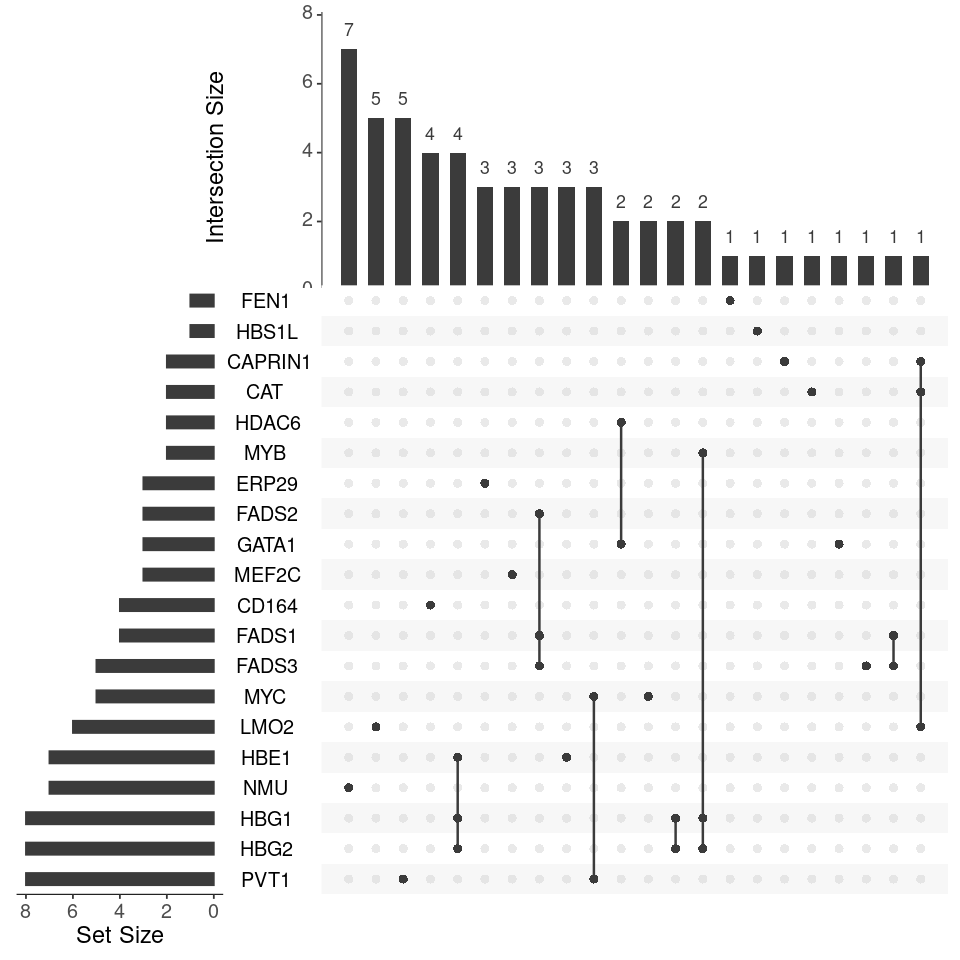

In [11]:
### get table and set lists
lst = lst_dat_region_annot_import
idx = "fcc_astarr_macs_input_overlap"
dat = lst[[idx]]
lst = split(dat$Region, dat$Gene)

### generate plot
plt = upset(
    fromList(lst), 
    order.by = "freq", 
    text.scale=1.7, 
    nsets = 20, 
    nintersects=NA,
    mb.ratio = c(0.3, 0.7)
)

### assign and show
plt_export_upset_gene = plt
options(repr.plot.height=8, repr.plot.width=8)
print(plt)

**Save plots**

In [12]:
plt_export = plt_export_upset_gene
txt_export = "fig.region_annot.astarr_input_overlap.fcc_crispri_hcrff.upset.gene"

txt_fdiry = "./"
txt_fname = paste(txt_export, "png", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
#ggsave(txt_fpath, plt_export, height = 4, width = 7, units = "in")
png(txt_fpath, width = 8, height = 8, units = "in", res = 300)
print(plt_export)
dev.off()

txt_fdiry = "./"
txt_fname = paste(txt_export, "svg", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
#ggsave(txt_fpath, plt_export, height = 4, width = 7, units = "in")
svg(txt_fpath, width = 8, height = 8)
print(plt_export)
dev.off()

pdf 
  2

pdf 
  2